# Lab 10: Fully Connected Neural Networks

In this assignment, we will learn fully connected neural network.


## 1. Example

This assignement should be run on Google Colab where you can use free GPU to accelerate the computation. Please refer to our slides to set up GPU.

### 1. Install Pytorch

In [1]:
!pip3 install torch torchvision   # install pytorch

### 2. Check GPU

In [2]:
!/opt/bin/nvidia-smi  #show GPU

Tue Apr 16 03:34:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 3. Mount to google drive (optional)

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

### 4. Code

In [4]:
#Import Libraries
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
args={}
args['batch_size']=100
args['test_batch_size']=100
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.01 #Learning rate is how fast it will decend.
args['log_interval']=10

In [6]:
# build an mlp
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(28*28, 256)   # linear layer (784 -> 256)
        self.fc2 = nn.Linear(256,128)  # linear layer (256 -> 128)
        self.fc3 = nn.Linear(128,10)  # linear layer (128 -> 10)

    def forward(self, x):
        h0 = x.view(-1,28*28) #input layer
        h1 = F.relu(self.fc1(h0)) # hidden layer 1
        h2 = F.relu(self.fc2(h1)) # hidden layer 2
        h3 = self.fc3(h2) # output layer

        return h3

model = Net()
model.cuda() # put the model on GPU
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [7]:
# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(),lr = args['lr'])

In [8]:
def train(epoch, model):
    model.train()

    losses = []

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.cuda(), target.cuda()

        output = model(data)
        loss = criterion(output, target)

        # compute gradients
        optimizer.zero_grad()
        loss.backward()

        # save loss
        loss_scaler = loss.item()
        losses.append(loss_scaler)

        #to do a one-step update on our parameter.
        optimizer.step()

        #Print out the loss periodically.
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss_scaler))

    return losses

In [9]:
def test(model):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = data.cuda(), target.cuda()

        output = model(data)
        test_loss += criterion(output, target).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    acc = correct / len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), 100. * acc))

    return acc


In [10]:
#load the data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['batch_size'], shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['test_batch_size'], shuffle=False)

In [11]:
for epoch in range(1, args['epochs'] + 1):
    train(epoch, model)
    test(model)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.306126
Train Epoch: 1 [1000/60000 (2%)]	Loss: 2.286865
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.254128
Train Epoch: 1 [3000/60000 (5%)]	Loss: 2.254819
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.204907
Train Epoch: 1 [5000/60000 (8%)]	Loss: 2.176903
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.123610
Train Epoch: 1 [7000/60000 (12%)]	Loss: 2.067445
Train Epoch: 1 [8000/60000 (13%)]	Loss: 2.048908
Train Epoch: 1 [9000/60000 (15%)]	Loss: 1.967696
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.938792
Train Epoch: 1 [11000/60000 (18%)]	Loss: 1.869389
Train Epoch: 1 [12000/60000 (20%)]	Loss: 1.751832
Train Epoch: 1 [13000/60000 (22%)]	Loss: 1.664510
Train Epoch: 1 [14000/60000 (23%)]	Loss: 1.592876
Train Epoch: 1 [15000/60000 (25%)]	Loss: 1.570226
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.395864
Train Epoch: 1 [17000/60000 (28%)]	Loss: 1.359329
Train Epoch: 1 [18000/60000 (30%)]	Loss: 1.323993
Train Epoch: 1 [19000/60000 (32%)]	Loss: 1.260736
Train Epoch: 1 [200

## 2. Tasks

### 1. Please use other activation functions, e.g., sigmoid, tanh, and then plot the training loss and testing accuracy.

When plotting the training loss, the x-axis is iteration and the y-axis is training loss. When plotting the testing accuracy,  the x-axis is epoch and the y-axis is the training loss.

# Sigmoid


In [12]:
# build an mlp
class Net_sigmoid(nn.Module):
    def __init__(self):
        super(Net_sigmoid, self).__init__()

        self.fc1 = nn.Linear(28*28, 256)   # linear layer (784 -> 256)
        self.fc2 = nn.Linear(256,128)      # linear layer (256 -> 128)
        self.fc3 = nn.Linear(128,10)       # linear layer (128 -> 10)

    def forward(self, x):
        h0 = x.view(-1,28*28) #input layer
        h1 = F.sigmoid(self.fc1(h0)) # hidden layer 1
        h2 = F.sigmoid(self.fc2(h1)) # hidden layer 2
        h3 = self.fc3(h2) # output layer

        return h3

model = Net_sigmoid()
model.cuda() # put the model on GPU

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(),lr = args['lr'])

# data saves
loss_values, acc_values = [0]*args['epochs'], [0]*args['epochs']

# run model and grad
for epoch in range(1, args['epochs'] + 1):
    loss_values[epoch - 1] = train(epoch, model)
    acc_values[epoch - 1]  = test(model)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.308232
Train Epoch: 1 [1000/60000 (2%)]	Loss: 2.332809
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.323164
Train Epoch: 1 [3000/60000 (5%)]	Loss: 2.307323
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.282111
Train Epoch: 1 [5000/60000 (8%)]	Loss: 2.303365
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.308442
Train Epoch: 1 [7000/60000 (12%)]	Loss: 2.291369
Train Epoch: 1 [8000/60000 (13%)]	Loss: 2.302390
Train Epoch: 1 [9000/60000 (15%)]	Loss: 2.294100
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.289562
Train Epoch: 1 [11000/60000 (18%)]	Loss: 2.300136
Train Epoch: 1 [12000/60000 (20%)]	Loss: 2.297228
Train Epoch: 1 [13000/60000 (22%)]	Loss: 2.298160
Train Epoch: 1 [14000/60000 (23%)]	Loss: 2.294999
Train Epoch: 1 [15000/60000 (25%)]	Loss: 2.284709
Train Epoch: 1 [16000/60000 (27%)]	Loss: 2.292072
Train Epoch: 1 [17000/60000 (28%)]	Loss: 2.286489
Train Epoch: 1 [18000/60000 (30%)]	Loss: 2.288333
Train Epoch: 1 [19000/60000 (32%)]	Loss: 2.278283
Train Epoch: 1 [200

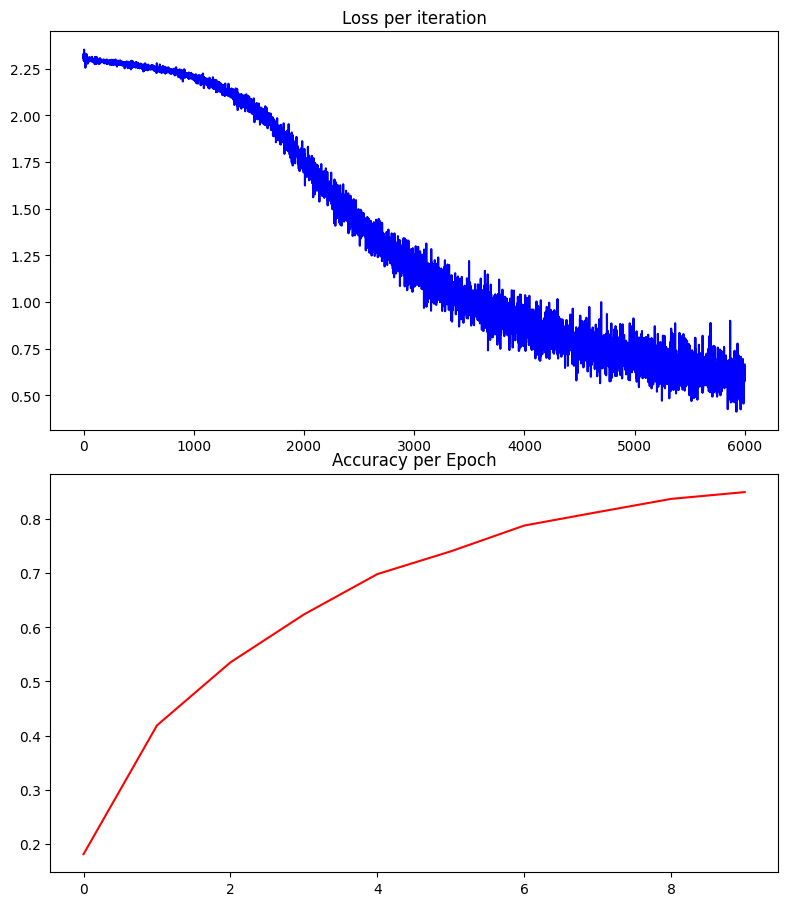

In [13]:
import numpy as np
import matplotlib.pyplot as plt

y1, y2 = np.array(loss_values).flatten(), np.array(acc_values)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 9))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.title("Loss per iteration")
plt.plot(np.arange(y1.size), y1, label='Average Loss per iteration', color='blue')

plt.subplot(2, 1, 2)
plt.title("Accuracy per Epoch")
plt.plot(np.arange(y2.size), y2, label='Acc / Epoch', color='red')


plt.show()

In [14]:
# plot

fig = make_subplots(rows=2, cols=1, subplot_titles=("Loss per iteration", "Accuracy per Epoch"))

# Plotting the loss per iteration
fig.add_trace(
    go.Scatter(x=np.arange(y1.size), y=y1, mode='lines', name='Average Loss per iteration', line=dict(color='blue')),
    row=1, col=1
)

# Plotting the accuracy per epoch
fig.add_trace(
    go.Scatter(x=np.arange(y2.size), y=y2, mode='lines', name='Acc / Epoch', line=dict(color='red')),
    row=2, col=1
)

# Update the layout
fig.update_layout(height=600, width=800, showlegend=True)

# Show the figure
fig.show()

# Tanh

In [15]:
# build an mlp
class Net_tanh(nn.Module):
    def __init__(self):
        super(Net_tanh, self).__init__()

        self.fc1 = nn.Linear(28*28, 256)   # linear layer (784 -> 256)
        self.fc2 = nn.Linear(256,128)      # linear layer (256 -> 128)
        self.fc3 = nn.Linear(128,10)       # linear layer (128 -> 10)

    def forward(self, x):
        h0 = x.view(-1,28*28) #input layer
        h1 = F.tanh(self.fc1(h0)) # hidden layer 1
        h2 = F.tanh(self.fc2(h1)) # hidden layer 2
        h3 = self.fc3(h2) # output layer

        return h3

model = Net_tanh()
model.cuda() # put the model on GPU

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(),lr = args['lr'])

# data saves
loss_values, acc_values = [0]*args['epochs'], [0]*args['epochs']

# run model and grad
for epoch in range(1, args['epochs'] + 1):
    loss_values[epoch - 1] = train(epoch, model)
    acc_values[epoch - 1]  = test(model)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.314639
Train Epoch: 1 [1000/60000 (2%)]	Loss: 2.207942
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.141339
Train Epoch: 1 [3000/60000 (5%)]	Loss: 2.035541
Train Epoch: 1 [4000/60000 (7%)]	Loss: 1.962692
Train Epoch: 1 [5000/60000 (8%)]	Loss: 1.909770
Train Epoch: 1 [6000/60000 (10%)]	Loss: 1.806816
Train Epoch: 1 [7000/60000 (12%)]	Loss: 1.633735
Train Epoch: 1 [8000/60000 (13%)]	Loss: 1.518502
Train Epoch: 1 [9000/60000 (15%)]	Loss: 1.498485
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.443341
Train Epoch: 1 [11000/60000 (18%)]	Loss: 1.408354
Train Epoch: 1 [12000/60000 (20%)]	Loss: 1.377891
Train Epoch: 1 [13000/60000 (22%)]	Loss: 1.315456
Train Epoch: 1 [14000/60000 (23%)]	Loss: 1.162497
Train Epoch: 1 [15000/60000 (25%)]	Loss: 1.091337
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.048007
Train Epoch: 1 [17000/60000 (28%)]	Loss: 1.117829
Train Epoch: 1 [18000/60000 (30%)]	Loss: 1.077523
Train Epoch: 1 [19000/60000 (32%)]	Loss: 0.950372
Train Epoch: 1 [200

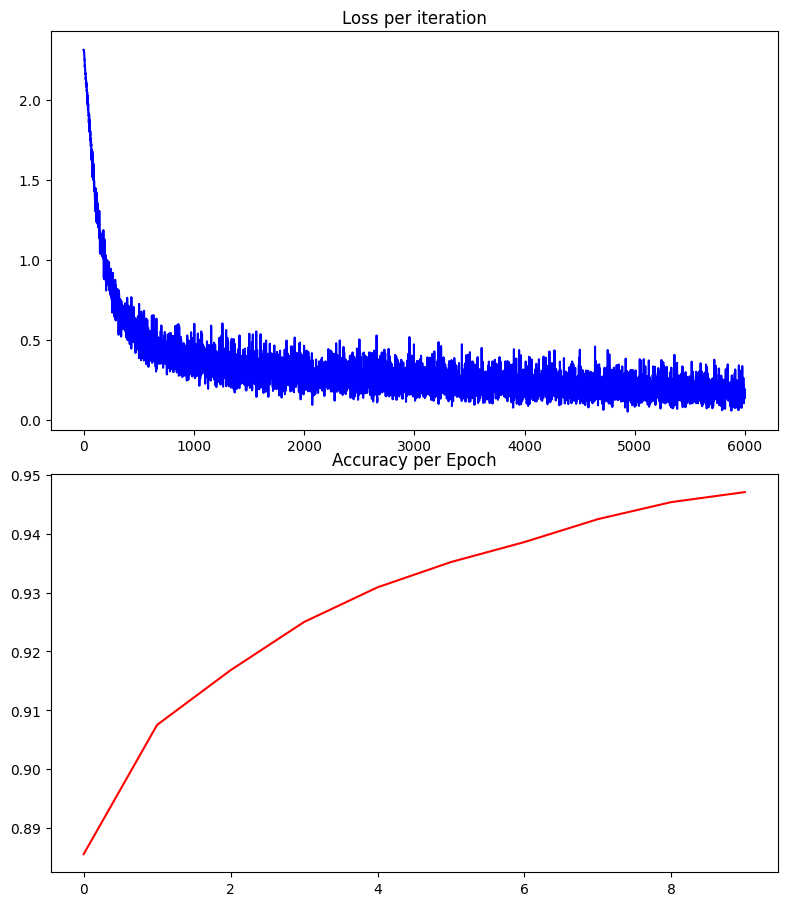

In [16]:
y1, y2 = np.array(loss_values).flatten(), np.array(acc_values)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 9))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.title("Loss per iteration")
plt.plot(np.arange(y1.size), y1, label='Average Loss per iteration', color='blue')

plt.subplot(2, 1, 2)
plt.title("Accuracy per Epoch")
plt.plot(np.arange(y2.size), y2, label='Acc / Epoch', color='red')


plt.show()

In [17]:
# plot

fig = make_subplots(rows=2, cols=1, subplot_titles=("Loss per iteration", "Accuracy per Epoch"))

# Plotting the loss per iteration
fig.add_trace(
    go.Scatter(x=np.arange(y1.size), y=y1, mode='lines', name='Average Loss per iteration', line=dict(color='blue')),
    row=1, col=1
)

# Plotting the accuracy per epoch
fig.add_trace(
    go.Scatter(x=np.arange(y2.size), y=y2, mode='lines', name='Acc / Epoch', line=dict(color='red')),
    row=2, col=1
)

# Update the layout
fig.update_layout(height=600, width=800, showlegend=True)

# Show the figure
fig.show()

### 2. Please use different layers in the model, e.g., 1 layer, 5 layers, 10 layers,  and then plot the training loss and testing accuracy.

# 4 layers

In [18]:
# build an mlp
class Net_4_layer(nn.Module):
    def __init__(self):
        super(Net_4_layer, self).__init__()

        self.fc1 = nn.Linear(28*28, 256)   # linear layer (784 -> 256)
        self.fc2 = nn.Linear(256, 128)      # linear layer (256 -> 128)
        self.fc3 = nn.Linear(128, 10)       # linear layer (128 -> 64)
        self.fc4 = nn.Linear(64,10)         # linear layer (64->10)

    def forward(self, x):
        h0 = x.view(-1, 28*28)  # input layer
        h1 = F.sigmoid(self.fc1(h0))  # hidden layer 1
        h2 = F.sigmoid(self.fc2(h1))  # hidden layer 2
        h3 = F.relu(self.fc3(h2))
        h4 = self.fc4(h3)  # output layer


        return h4


model = Net_4_layer()
model.cuda()  # put the model on GPU

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=args['lr'])

# data saves
loss_values, acc_values = [0]*args['epochs'], [0]*args['epochs']

# run model and grad
for epoch in range(1, args['epochs'] + 1):
    loss_values[epoch - 1] = train(epoch, model)
    acc_values[epoch - 1] = test(model)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.326535
Train Epoch: 1 [1000/60000 (2%)]	Loss: 2.361186
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.296474
Train Epoch: 1 [3000/60000 (5%)]	Loss: 2.318093
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.304067
Train Epoch: 1 [5000/60000 (8%)]	Loss: 2.309873
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.279737
Train Epoch: 1 [7000/60000 (12%)]	Loss: 2.305923
Train Epoch: 1 [8000/60000 (13%)]	Loss: 2.295409
Train Epoch: 1 [9000/60000 (15%)]	Loss: 2.288174
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.283639
Train Epoch: 1 [11000/60000 (18%)]	Loss: 2.280345
Train Epoch: 1 [12000/60000 (20%)]	Loss: 2.300765
Train Epoch: 1 [13000/60000 (22%)]	Loss: 2.282597
Train Epoch: 1 [14000/60000 (23%)]	Loss: 2.299886
Train Epoch: 1 [15000/60000 (25%)]	Loss: 2.287182
Train Epoch: 1 [16000/60000 (27%)]	Loss: 2.299058
Train Epoch: 1 [17000/60000 (28%)]	Loss: 2.299655
Train Epoch: 1 [18000/60000 (30%)]	Loss: 2.284739
Train Epoch: 1 [19000/60000 (32%)]	Loss: 2.284392
Train Epoch: 1 [200

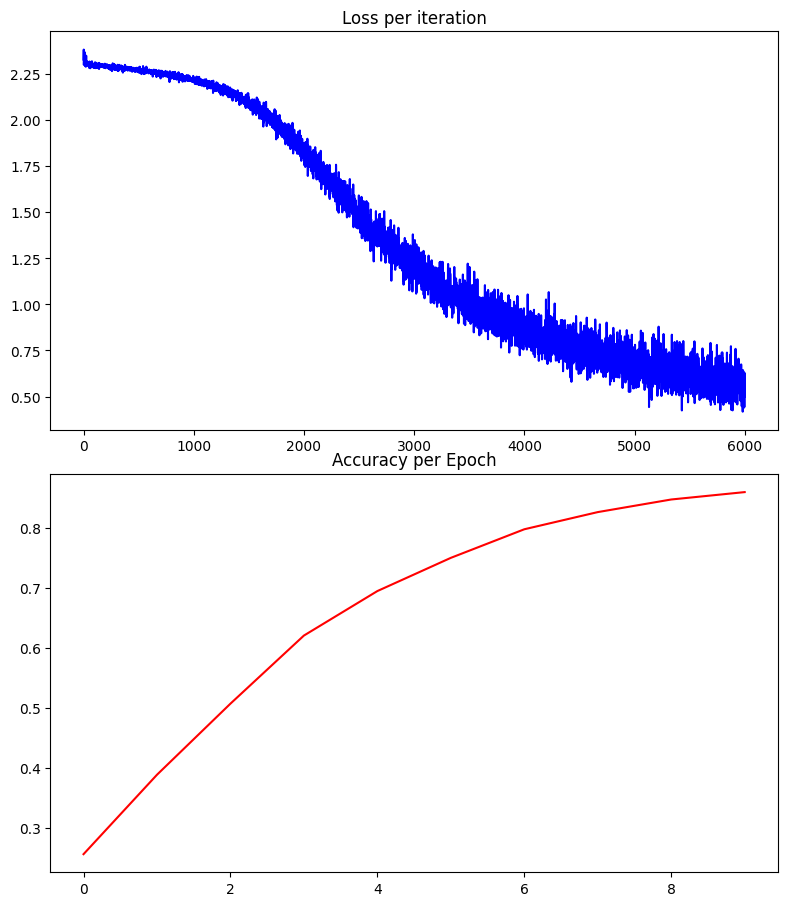

In [19]:
y1, y2 = np.array(loss_values).flatten(), np.array(acc_values)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 9))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.title("Loss per iteration")
plt.plot(np.arange(y1.size), y1, label='Average Loss per iteration', color='blue')

plt.subplot(2, 1, 2)
plt.title("Accuracy per Epoch")
plt.plot(np.arange(y2.size), y2, label='Acc / Epoch', color='red')


plt.show()

In [20]:
# plot

fig = make_subplots(rows=2, cols=1, subplot_titles=("Loss per iteration", "Accuracy per Epoch"))

# Plotting the loss per iteration
fig.add_trace(
    go.Scatter(x=np.arange(y1.size), y=y1, mode='lines', name='Average Loss per iteration', line=dict(color='blue')),
    row=1, col=1
)

# Plotting the accuracy per epoch
fig.add_trace(
    go.Scatter(x=np.arange(y2.size), y=y2, mode='lines', name='Acc / Epoch', line=dict(color='red')),
    row=2, col=1
)

# Update the layout
fig.update_layout(height=600, width=800, showlegend=True)

# Show the figure
fig.show()

In [ ]:
# 10 Layers

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net_10_layer(nn.Module):
    def __init__(self):
        super(Net_10_layer, self).__init__()

        # Define 10 layers
        self.fc1 = nn.Linear(28 * 28, 512)  # Linear layer (784 -> 512)
        self.fc2 = nn.Linear(512, 256)  # Linear layer (512 -> 256)
        self.fc3 = nn.Linear(256, 128)  # Linear layer (256 -> 128)
        self.fc4 = nn.Linear(128, 64)  # Linear layer (128 -> 64)
        self.fc5 = nn.Linear(64, 32)  # Linear layer (64 -> 32)
        self.fc6 = nn.Linear(32, 16)  # Linear layer (32 -> 16)
        self.fc7 = nn.Linear(16, 8)  # Linear layer (16 -> 8)
        self.fc8 = nn.Linear(8, 4)  # Linear layer (8 -> 4)
        self.fc9 = nn.Linear(4, 2)  # Linear layer (4 -> 2)
        self.fc10 = nn.Linear(2, 10)  # Linear layer (2 -> 10) output layer

    # mix activation
    def forward(self, x):
        h0 = x.view(-1, 28 * 28)  # Reshape input to (batch_size, 28*28)
        h1 = F.relu(self.fc1(h0))  # Hidden layer 1 with ReLU activation
        h2 = F.tanh(self.fc2(h1))  # Hidden layer 2 with tanh activation
        h3 = F.relu(self.fc3(h2))  # Hidden layer 3 with ReLU activation
        h4 = F.sigmoid(self.fc4(h3))  # Hidden layer 4 with sigmoid activation
        h5 = F.relu(self.fc5(h4))  # Hidden layer 5 with ReLU activation
        h6 = F.relu(self.fc6(h5))  # Hidden layer 6 with ReLU activation
        h7 = F.sigmoid(self.fc7(h6))  # Hidden layer 7 with sigmoid activation
        h8 = F.relu(self.fc8(h7))  # Hidden layer 8 with ReLU activation
        h9 = F.tanh(self.fc9(h8))  # Hidden layer 9 with tanh activation
        h10 = self.fc10(h9)  # Output layer

        return h10

# Instantiate the model
model = Net_10_layer()
model.cuda()  # Move the model to GPU

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=args['lr'])

# Arrays to save loss and accuracy values
loss_values, acc_values = [0] * args['epochs'], [0] * args['epochs']

# Run model training and evaluation
for epoch in range(1, args['epochs'] + 1):
    loss_values[epoch - 1] = train(epoch, model)
    acc_values[epoch - 1] = test(model)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.338598
Train Epoch: 1 [1000/60000 (2%)]	Loss: 2.400086
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.437571
Train Epoch: 1 [3000/60000 (5%)]	Loss: 2.370783
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.354072
Train Epoch: 1 [5000/60000 (8%)]	Loss: 2.321074
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.364678
Train Epoch: 1 [7000/60000 (12%)]	Loss: 2.322180
Train Epoch: 1 [8000/60000 (13%)]	Loss: 2.378792
Train Epoch: 1 [9000/60000 (15%)]	Loss: 2.351310
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.327545
Train Epoch: 1 [11000/60000 (18%)]	Loss: 2.328223
Train Epoch: 1 [12000/60000 (20%)]	Loss: 2.352387
Train Epoch: 1 [13000/60000 (22%)]	Loss: 2.323166
Train Epoch: 1 [14000/60000 (23%)]	Loss: 2.326376
Train Epoch: 1 [15000/60000 (25%)]	Loss: 2.294092
Train Epoch: 1 [16000/60000 (27%)]	Loss: 2.359257
Train Epoch: 1 [17000/60000 (28%)]	Loss: 2.332678
Train Epoch: 1 [18000/60000 (30%)]	Loss: 2.301967
Train Epoch: 1 [19000/60000 (32%)]	Loss: 2.325430
Train Epoch: 1 [200

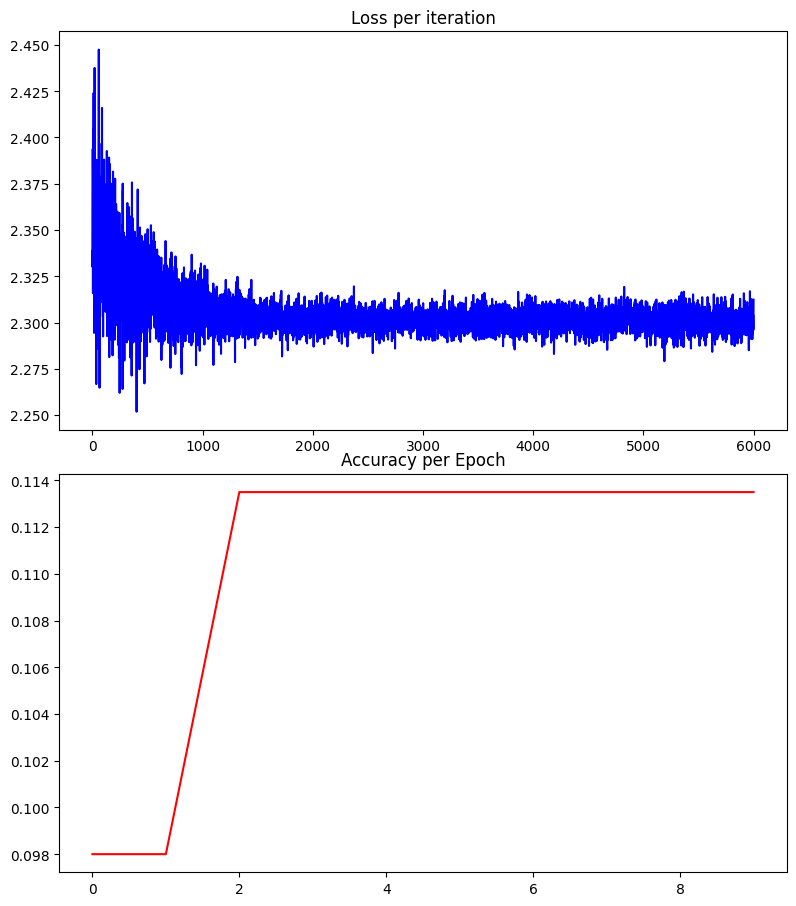

In [22]:
y1, y2 = np.array(loss_values).flatten(), np.array(acc_values)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 9))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.title("Loss per iteration")
plt.plot(np.arange(y1.size), y1, label='Average Loss per iteration', color='blue')

plt.subplot(2, 1, 2)
plt.title("Accuracy per Epoch")
plt.plot(np.arange(y2.size), y2, label='Acc / Epoch', color='red')


plt.show()

In [23]:
# plot

fig = make_subplots(rows=2, cols=1, subplot_titles=("Loss per iteration", "Accuracy per Epoch"))

# Plotting the loss per iteration
fig.add_trace(
    go.Scatter(x=np.arange(y1.size), y=y1, mode='lines', name='Average Loss per iteration', line=dict(color='blue')),
    row=1, col=1
)

# Plotting the accuracy per epoch
fig.add_trace(
    go.Scatter(x=np.arange(y2.size), y=y2, mode='lines', name='Acc / Epoch', line=dict(color='red')),
    row=2, col=1
)

# Update the layout
fig.update_layout(height=600, width=800, showlegend=True)

# Show the figure
fig.show()